In [39]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,recall_score
import itertools
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

In [40]:

#数据导入与查看
data=pd.read_csv("./credit_risk_small_data.csv")
# print(data.head())
# print(data.info)
# print(data1.info)

In [41]:
#初步查看数据
print(data.keys())

Index(['Delinquency', 'Revolving Credit Percentage', 'Capital Reserves',
       'Num Late 60', 'Debt Ratio', 'Monthly Income', 'Num Credit Lines',
       'Num Late Past 90', 'Num Real Estate', 'Num Late 90', 'Num Employees'],
      dtype='object')


In [42]:
# #进一步查看感兴趣的数据
# features_of_interest=["Revolving Credit Percentage","Debt Ratio","Capital Reserves","Num Late 60","Monthly Income","Num Credit Lines","Num Late Past 90","Num Real Estate","Num Late 90","Num Employees"]
# data[features_of_interest].describe()

In [43]:
# #去离群值
# data["Revolving Credit Percentage"]=np.minimum(data["Revolving Credit Percentage"],10)
# print(data["Revolving Credit Percentage"].describe())
# data["Debt Ratio"]=np.minimum(data["Debt Ratio"],25)
# print(data["Debt Ratio"].describe())
# data["Capital Reserves"]=np.minimum(data["Capital Reserves"],90)
# print(data["Capital Reserves"].describe())
# data["Num Late 60"]=np.minimum(data["Num Late 60"],5)
# print(data["Num Late 60"].describe())
# data["Monthly Income"]=np.minimum(data["Monthly Income"],100000)
# print(data["Monthly Income"].describe())
# data["Num Credit Lines"]=np.minimum(data["Num Credit Lines"],30)
# print(data["Num Credit Lines"].describe())
# data["Num Late Past 90"]=np.minimum(data["Num Late Past 90"],5)
# print(data["Num Late Past 90"].describe())
# data["Num Real Estate"]=np.minimum(data["Num Real Estate"],7)
# print(data["Num Real Estate"].describe())
# data["Num Late 90"]=np.minimum(data["Num Late 90"],7)
# print(data["Num Late 90"].describe())
# data["Num Employees"]=np.minimum(data["Num Employees"],5)
# print(data["Num Employees"].describe())

In [44]:
# #查看数据相关性
# sns.scatterplot(data=data,x="Revolving Credit Percentage",y="Debt Ratio",size="Delinquency",hue="Delinquency",palette="viridis",alpha=0.5)
# plt.legend(title="Delinquency",bbox_to_anchor=(1.05,1),loc="upper left")
# plt.show()

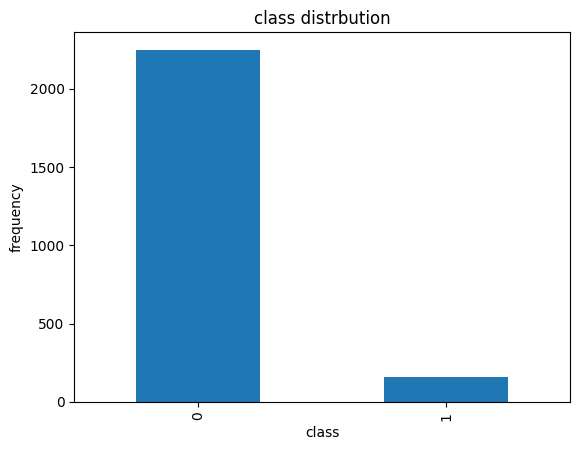

In [45]:
#查看标签分布
count_classes=pd.value_counts(data['Delinquency'],sort=True).sort_index()
count_classes.plot(kind='bar')
plt.title("class distrbution")
plt.xlabel("class")
plt.ylabel("frequency")
plt.show()

In [46]:
# #数据标准化处理
data['Capital Reserves']=StandardScaler().fit_transform(data['Capital Reserves'].values.reshape(-1,1))
data['Monthly Income']=StandardScaler().fit_transform(data['Monthly Income'].values.reshape(-1,1))
# data['Num Credit Lines']=StandardScaler().fit_transform(data['Num Credit Lines'].values.reshape(-1,1))
# data['Num Late Past 90']=StandardScaler().fit_transform(data['Num Late Past 90'].values.reshape(-1,1))
# data['Num Real Estate']=StandardScaler().fit_transform(data['Num Real Estate'].values.reshape(-1,1))
# data['Num Late 90']=StandardScaler().fit_transform(data['Num Late 90'].values.reshape(-1,1))
# data['Num Employees']=StandardScaler().fit_transform(data['Num Employees'].values.reshape(-1,1))
# # print(data['normI'].head())

In [47]:
# # 保存为CSV文件
# np.savetxt('output_2048.csv', data, delimiter=',')

In [48]:
X=data.iloc[:,data.columns!='Delinquency']
# X=data.iloc[:,1:]
# X=X.iloc[:,X.columns!='Debt Ratio']
# # X=X.iloc[:,X.columns!='Capital Reserves']
y=data.iloc[:,data.columns=='Delinquency']

In [49]:
#整个数据集进行划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
#上采样
oversampler=SMOTE(random_state=0)
X_train,y_train=oversampler.fit_resample(X_train,y_train)

In [51]:
# 以使用imblearn进行随机过采样为例
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=0)
# X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
# 查看结果
# Counter(y_resampled) 
# 过采样后样本结果Counter({2: 4674, 1: 4674, 0: 4674})各类样本数相同
# X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,random_state=0)

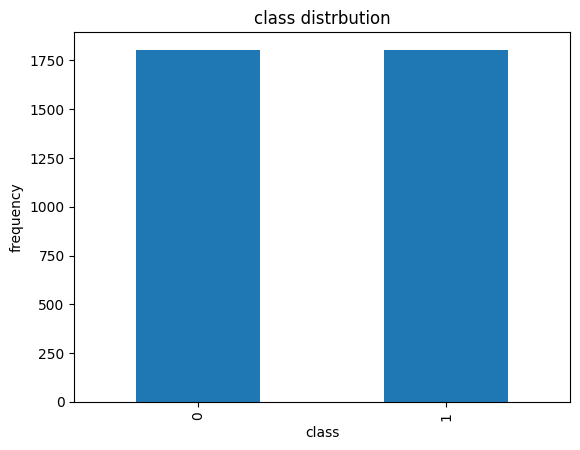

In [52]:
# 查看标签分布
count_classes=pd.value_counts(y_train['Delinquency'],sort=True).sort_index()
count_classes.plot(kind='bar')
plt.title("class distrbution")
plt.xlabel("class")
plt.ylabel("frequency")
plt.show()

In [53]:
#进一步查看感兴趣的数据
X_train.describe()

,Revolving Credit Percentage,Capital Reserves,Num Late 60,Debt Ratio,Monthly Income,Num Credit Lines,Num Late Past 90,Num Real Estate,Num Late 90,Num Employees
count,3608.000000,3608.000000,3608.000000,3608.000000,3608.000000,3608.000000,3608.000000,3608.000000,3608.000000,3608.000000
mean,5.049609,-0.183362,2.007761,15.985373,-0.101149,8.220344,1.750277,0.840909,1.632761,0.795455
std,90.578089,0.899280,11.775482,166.899158,0.798364,5.295688,11.769715,1.123468,11.755956,1.069921
min,0.000000,-2.031485,0.000000,0.000000,-1.063454,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.119146,-0.854346,0.000000,0.139553,-0.500337,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.541471,-0.214109,0.000000,0.324680,-0.244891,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.892493,0.351827,1.000000,0.532536,0.080499,11.000000,0.000000,1.000000,0.000000,1.000000
max,3677.000000,3.007517,98.000000,3102.000000,18.243424,42.000000,98.000000,19.000000,98.000000,7.000000


In [54]:
X_train = np.array(X_train,type(float))

In [55]:
#去离群值
X_train [:,0]=np.minimum(X_train[:,0],232)
X_train [:,1]=np.minimum(X_train[:,1],2)
X_train [:,2]=np.minimum(X_train[:,2],22.2)
X_train [:,3]=np.minimum(X_train[:,3],280)
X_train [:,4]=np.minimum(X_train[:,4],2)
X_train [:,5]=np.minimum(X_train[:,5],20)
X_train [:,6]=np.minimum(X_train[:,6],22)
X_train [:,7]=np.minimum(X_train[:,7],3)
X_train [:,8]=np.minimum(X_train[:,8],22)
X_train [:,9]=np.minimum(X_train[:,9],5)


In [56]:
bag_clf=BaggingClassifier(SVC(),n_estimators=10,bootstrap=True,max_samples=0.5)

bag_clf.fit(X_train,y_train)
y_pred=bag_clf.predict(X_test)
print(y_pred)

cm = confusion_matrix(y_test, y_pred)
TP = cm[0][0] 
FN = cm[0][1] 
FP = cm[1][0] 
TN = cm[1][1]
acc = (TP + TN) / (TP + FN + FP + TN)
print(bag_clf.__class__.__name__,'准确率=',acc)
sensitivity = TP / (TP + FN)
print(bag_clf.__class__.__name__,'sensitivity=',sensitivity)
specificity = TN / (TN + FP)
print(bag_clf.__class__.__name__,'specificity=',specificity)
precision=TP/(TP+FP)
print(bag_clf.__class__.__name__,'precision=',precision)
F1_score=2*precision*sensitivity/(precision+sensitivity)
print(bag_clf.__class__.__name__,'F1_score=',F1_score)
print(classification_report(y_test,y_pred ))

C:\Users\20450\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\20450\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(


[0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0
 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1
 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
BaggingClassifier 准确率= 0

<Figure size 640x480 with 0 Axes>

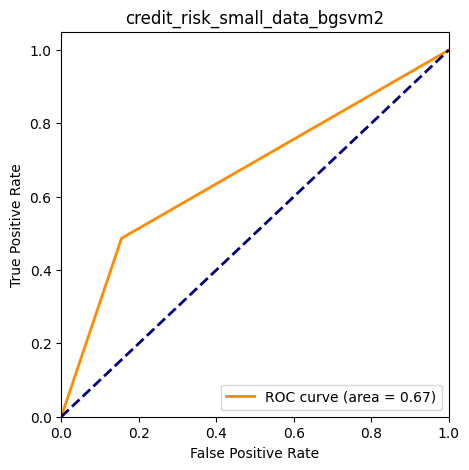

In [57]:
#ROC曲线
# 计算
fpr, tpr, thread = roc_curve(y_test, y_pred)
roc_auc= auc(fpr, tpr)
# 绘图
plt.figure()
lw = 2
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('credit_risk_small_data_bgsvm2')
plt.legend(loc="lower right")
plt.show()